In [1]:
import pandas as pd


In [2]:
ds = pd.read_csv(r"C:\Users\ankit kumar jha\Downloads\diabetes.csv")
print(ds.shape)

print(ds.head())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
x=ds.drop('Outcome',axis=1)
y=ds['Outcome']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.36, random_state=42
)

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [6]:
y_pred=gnb.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)


0.7472924187725631


In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)
score=accuracy_score(y_dummy_pred,y_test)
print(score)
print(classification_report(y_test, y_dummy_pred))

0.6750902527075813
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       187
           1       0.00      0.00      0.00        90

    accuracy                           0.68       277
   macro avg       0.34      0.50      0.40       277
weighted avg       0.46      0.68      0.54       277



C:\Users\ankit kumar jha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ankit kumar jha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ankit kumar jha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from sklearn.model_selection import GridSearchCV

In [12]:
import numpy as np
param_grid = {'var_smoothing': np.logspace(-9, -6, 10)}

In [13]:
grid_nb = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e-09, 2.15443469e-09, 4.64158883e-09, 1.00000000e-08,
       2.15443469e-08, 4.64158883e-08, 1.00000000e-07, 2.15443469e-07,
       4.64158883e-07, 1.00000000e-06])},
             scoring='accuracy')

In [14]:
grid_nb.best_params_

{'var_smoothing': 1e-06}

In [16]:
best_nb = grid_nb.best_estimator_
y_pred_best = best_nb.predict(X_test)
print(accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

0.7472924187725631
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       187
           1       0.61      0.63      0.62        90

    accuracy                           0.75       277
   macro avg       0.71      0.72      0.72       277
weighted avg       0.75      0.75      0.75       277



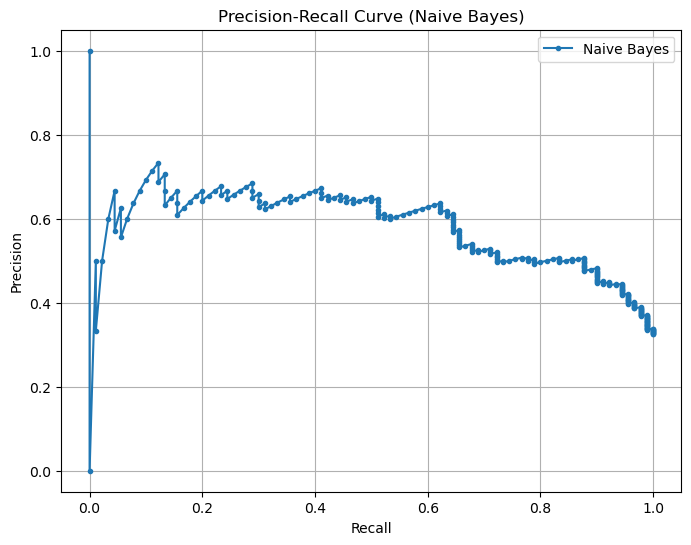

In [18]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_scores_nb = best_nb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_nb)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Naive Bayes)')
plt.legend()
plt.grid()
plt.show()

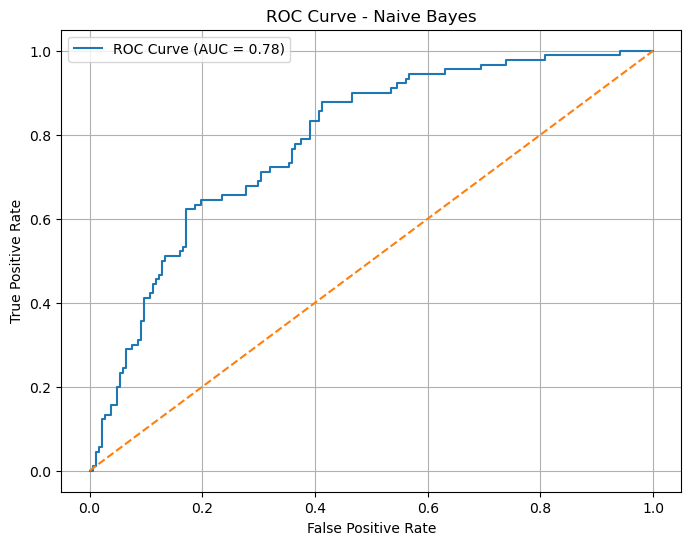

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_scores_nb)
roc_auc = roc_auc_score(y_test, y_scores_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.grid()
plt.show()